In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import torch.nn as nn
import torch
import torch.nn.functional as F

device = 'cuda:0'


# 2d pose estimator - pretrained
class CPM2DPose(nn.Module):
    def __init__(self):
        super(CPM2DPose, self).__init__()

        self.scoremap_list = []
        self.layers_per_block = [2, 2, 4, 2]
        self.out_chan_list = [64, 128, 256, 512]
        self.pool_list = [True, True, True, False]

        self.relu = F.leaky_relu
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_1
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv3_4 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv4_3 = nn.Conv2d(512, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv4_4 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv4_5 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv4_6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv4_7 = nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1, bias=True)  # conv0_2
        self.conv5_1 = nn.Conv2d(128, 512, kernel_size=1, stride=1, padding=0, bias=True)  # conv0_2
        self.conv5_2 = nn.Conv2d(512, 21, kernel_size=1, stride=1, padding=0, bias=True)  # conv0_2
        self.conv6_1 = nn.Conv2d(149, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv6_2 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv6_3 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv6_4 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv6_5 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv6_6 = nn.Conv2d(128, 128, kernel_size=1, stride=1, padding=0, bias=True)  # conv0_2
        self.conv6_7 = nn.Conv2d(128, 21, kernel_size=1, stride=1, padding=0, bias=True)  # conv0_2
        self.conv7_1 = nn.Conv2d(149, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv7_2 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv7_3 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv7_4 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv7_5 = nn.Conv2d(128, 128, kernel_size=7, stride=1, padding=3, bias=True)  # conv0_2
        self.conv7_6 = nn.Conv2d(128, 128, kernel_size=1, stride=1, padding=0, bias=True)  # conv0_2
        self.conv7_7 = nn.Conv2d(128, 21, kernel_size=1, stride=1, padding=0, bias=True)  # conv0_2
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes * block.expansion,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.relu(self.conv1_1(x))
        x = self.relu(self.conv1_2(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2_1(x))
        x = self.relu(self.conv2_2(x))
        x = self.maxpool(x)
        x = self.relu(self.conv3_1(x))
        x = self.relu(self.conv3_2(x))
        x = self.relu(self.conv3_3(x))
        x = self.relu(self.conv3_4(x))
        x = self.maxpool(x)
        x = self.relu(self.conv4_1(x))
        x = self.relu(self.conv4_2(x))
        x = self.relu(self.conv4_3(x))
        x = self.relu(self.conv4_4(x))
        x = self.relu(self.conv4_5(x))
        x = self.relu(self.conv4_6(x))
        encoding = self.relu(self.conv4_7(x))
        x = self.relu(self.conv5_1(encoding))
        scoremap = self.conv5_2(x)

        x = torch.cat([scoremap, encoding], 1)
        x = self.relu(self.conv6_1(x))
        x = self.relu(self.conv6_2(x))
        x = self.relu(self.conv6_3(x))
        x = self.relu(self.conv6_4(x))
        x = self.relu(self.conv6_5(x))
        x = self.relu(self.conv6_6(x))
        scoremap = self.conv6_7(x)
        x = torch.cat([scoremap, encoding], 1)
        x = self.relu(self.conv7_1(x))
        x = self.relu(self.conv7_2(x))
        x = self.relu(self.conv7_3(x))
        x = self.relu(self.conv7_4(x))
        x = self.relu(self.conv7_5(x))
        x = self.relu(self.conv7_6(x))
        x = self.conv7_7(x)
        return x

In [ ]:
gc.collect()
torch.cuda.empty_cache()

In [ ]:
import torch
import numpy as np
import torchvision
import tqdm
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import cv2

from glob import glob
import pandas
import torch.nn as nn

import math
import matplotlib.pyplot as plt

import gc
import torch

device = 'cuda:0'
num_joints = 21

categories = ['rock', 'scissors', 'paper']

class ObmanDataset(Dataset):
    def __init__(self, method=None):
        self.root = '/content/gdrive/My Drive/'
        self.x_data = []
        self.y_data = []
        self.len = 0

        if method == 'train':
            self.root = self.root + 'RSPdataset/train/'
            print('train')
            for idx, category in enumerate(categories):
                dir_path = self.root + category + '/'
                self.img_path = sorted(glob(dir_path + 'rgb/*.jpg'))
                print(self.img_path)

                for i in tqdm.tqdm(range(len(self.img_path))):
                    img = cv2.imread(self.img_path[i], cv2.IMREAD_COLOR)
                    b, g, r = cv2.split(img)
                    img = cv2.merge([r, g, b])
                    self.x_data.append(img)

                    num = self.img_path[i].split('.')[0].split('/')[-1]
                    img_pkl = dir_path + 'meta/' + str(num) + '.pkl'
                    #print(img_pkl)
                    pkl = pandas.read_pickle(img_pkl)
                    coords_2d = pkl['coords_2d']
                    self.y_data.append(coords_2d)
                    # print(coords_2d.shape)

                    self.len = self.len + 1

        elif method == 'test':
            self.root = self.root + 'RSPdataset/test/'
            for idx, category in enumerate(categories):
                dir_path = self.root + category + '/'
                self.img_path = sorted(glob(dir_path + 'rgb/*.jpg'))
                print(self.img_path)

                for i in tqdm.tqdm(range(len(self.img_path))):
                    img = cv2.imread(self.img_path[i], cv2.IMREAD_COLOR)
                    b, g, r = cv2.split(img)
                    img = cv2.merge([r, g, b])
                    self.x_data.append(img)

                    num = self.img_path[i].split('.')[0].split('/')[-1]
                    img_pkl = dir_path + 'meta/' + str(num) + '.pkl'
                    pkl = pandas.read_pickle(img_pkl)
                    coords_2d = pkl['coords_2d']
                    self.y_data.append(coords_2d)

                    self.len = self.len + 1

    def __len__(self):
        return self.len

    def __getitem__(self, idx):
        transform1 = torchvision.transforms.ToTensor()
        new_x_data = transform1(self.x_data[idx])
        # print(idx, self.y_data[idx], self.y_data[idx].shape)

        return new_x_data, self.y_data[idx]


class Trainer(object):
    def __init__(self, epochs, batch_size, lr):
        self.epochs = epochs
        self.batch_size = batch_size
        self.learning_rate = lr
        self._build_model()

        dataset = ObmanDataset(method='train')
        self.root = dataset.root
        self.dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        # Load of pretrained_weight file
        weight_PATH = '/content/gdrive/My Drive/CV_Final/finetunedweight.pth'
        self.poseNet.load_state_dict(torch.load(weight_PATH))

        print("Training...")

    def _build_model(self):
        # 2d pose estimator
        poseNet = CPM2DPose()
        self.poseNet = poseNet.to(device)
        self.poseNet.train()

        print('Finish build model.')

    def skeleton2heatmap(self, _heatmap, keypoint_targets):
        heatmap_gt = torch.zeros_like(_heatmap, device=_heatmap.device)

        keypoint_targets = (((keypoint_targets)) // 8)
        print(keypoint_targets.shape)
        for i in range(keypoint_targets.shape[0]):
            for j in range(21):
                x = int(keypoint_targets[i, j, 0])
                y = int(keypoint_targets[i, j, 1])
                heatmap_gt[i, j, x, y] = 1

        heatmap_gt = heatmap_gt.detach().cpu().numpy()
        for i in range(keypoint_targets.shape[0]):
            for j in range(21):
                heatmap_gt[i, j, :, :] = cv2.GaussianBlur(heatmap_gt[i, j, :, :], ksize=(3, 3), sigmaX=2, sigmaY=2) * 9 / 1.1772
        heatmap_gt = torch.FloatTensor(heatmap_gt).to(device)
        return heatmap_gt

    def train(self):
        date = '201105'

        loss_func = torch.nn.MSELoss()
        optimizer = torch.optim.SGD(self.poseNet.parameters(), lr=self.learning_rate)

        losses = []
        
        for epoch in tqdm.tqdm(range(self.epochs + 1)):
            gc.collect()
            torch.cuda.empty_cache()
            if epoch % 2 == 0:
                torch.save(self.poseNet.state_dict(), "_".join(['/content/gdrive/My Drive/CV_Final/', date, str(epoch), 'model.pth']))

            for batch_idx, samples in enumerate(self.dataloader):
                optimizer.zero_grad()

                x_train, y_train = samples
                heatmapsPoseNet = self.poseNet(x_train.cuda())
                gt_heatmap = self.skeleton2heatmap(heatmapsPoseNet, y_train)

                loss = loss_func(heatmapsPoseNet, gt_heatmap)
                loss.backward()
                optimizer.step()

                losses.append(loss.item())

                ## Write train result
                if batch_idx % 20 == 0:
                    with open('train_result_' + date + '.txt', 'a') as f:
                        f.write('Epoch {:4d}/{} Batch {}/{}\n'.format(
                            epoch, self.epochs, batch_idx, len(self.dataloader)
                        ))
                    print('Epoch {:4d}/{} Batch {}/{}'.format(
                        epoch, self.epochs, batch_idx, len(self.dataloader)
                    ))

        print('Finish training.')


class Tester(object):
    def __init__(self, batch_size):
        self.batch_size = batch_size
        self._build_model()

        dataset = ObmanDataset(method='test')
        self.root = dataset.root
        self.dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False)
        self.datalen = dataset.__len__()
        self.mse_all_img = []

        # Load of pretrained_weight file
        weight_PATH = '/content/gdrive/My Drive/CV_Final/_201105_30_model.pth'
        self.poseNet.load_state_dict(torch.load(weight_PATH))

        print("Testing...")

    def _build_model(self):
        # 2d pose estimator
        poseNet = CPM2DPose()
        self.poseNet = poseNet.to(device)

        print('Finish build model.')

    def heatmap2skeleton(self, heatmapsPoseNet):
        skeletons = np.zeros((heatmapsPoseNet.shape[0], heatmapsPoseNet.shape[1], 2))
        for m in range(heatmapsPoseNet.shape[0]):
            for i in range(heatmapsPoseNet.shape[1]):
                u, v = np.unravel_index(np.argmax(heatmapsPoseNet[m][i]), (32, 32))
                skeletons[m, i, 0] = u * 8
                skeletons[m, i, 1] = v * 8
        return skeletons

    def test(self):
        total_err = 0 # sum of all err
        img_num = 0   # total number of img

        for batch_idx, samples in enumerate(self.dataloader):
            x_test, y_test = samples
            heatmapsPoseNet = self.poseNet(x_test.cuda()).cpu().detach().numpy()
            skeletons_in = self.heatmap2skeleton(heatmapsPoseNet)
        
        # 1-5) calculate the average error
        # for each img, call calc_error()
            img_idx = 0
            for img_idx, skele in enumerate(skeletons_in):
                total_err += self.calc_error(skele, y_test.numpy()[img_idx])
            img_num += (img_idx+1)

        average_err = total_err/img_num
        print(average_err)

    
    # 1-4)
    # input : skeletons_in(prediction), coords_2d(ground-truth)
    # output : err for an img
    def calc_error(self, skeletons_in, coords_2d):
        K = 21
        err = 0
        for k in range(K):
            err += math.sqrt( math.pow(skeletons_in[k][0]-coords_2d[k][0], 2) + math.pow(skeletons_in[k][1]-coords_2d[k][1], 2) )
        err = err/K

        return err


def main():

    epochs = 30
    batchSize = 32
    learningRate = 5e-3

    #trainer = Trainer(epochs, batchSize, learningRate)
    #trainer.train()

    tester = Tester(batchSize)
    tester.test()


if __name__ == '__main__':
    main()



100%|██████████| 10/10 [00:00<00:00, 221.08it/s]


100%|██████████| 10/10 [00:00<00:00, 223.99it/s]


100%|██████████| 10/10 [00:00<00:00, 233.14it/s]

Finish build model.
['/content/gdrive/My Drive/RSPdataset/test/rock/rgb/00000000.jpg', '/content/gdrive/My Drive/RSPdataset/test/rock/rgb/00000001.jpg', '/content/gdrive/My Drive/RSPdataset/test/rock/rgb/00000002.jpg', '/content/gdrive/My Drive/RSPdataset/test/rock/rgb/00000003.jpg', '/content/gdrive/My Drive/RSPdataset/test/rock/rgb/00000004.jpg', '/content/gdrive/My Drive/RSPdataset/test/rock/rgb/00000005.jpg', '/content/gdrive/My Drive/RSPdataset/test/rock/rgb/00000006.jpg', '/content/gdrive/My Drive/RSPdataset/test/rock/rgb/00000007.jpg', '/content/gdrive/My Drive/RSPdataset/test/rock/rgb/00000008.jpg', '/content/gdrive/My Drive/RSPdataset/test/rock/rgb/00000009.jpg']
['/content/gdrive/My Drive/RSPdataset/test/scissors/rgb/00000000.jpg', '/content/gdrive/My Drive/RSPdataset/test/scissors/rgb/00000001.jpg', '/content/gdrive/My Drive/RSPdataset/test/scissors/rgb/00000002.jpg', '/content/gdrive/My Drive/RSPdataset/test/scissors/rgb/00000003.jpg', '/content/gdrive/My Drive/RSPdataset/t

Testing...
33.45123775249044


Finish build model.
/content/gdrive/My Drive/RSPdataset/test/Rock/00000170.jpg
/content/gdrive/My Drive/RSPdataset/test/Rock/meta/00000170.pkl
Testing...
3-1)


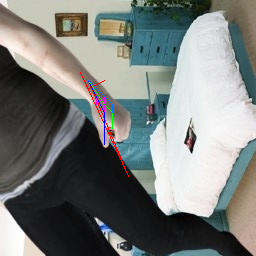

err : 
31.83999714457976


In [ ]:
import torch
import numpy as np
import torchvision
import tqdm
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import cv2

from glob import glob
import pandas
import torch.nn as nn

from google.colab.patches import cv2_imshow
import math
import matplotlib.pyplot as plt

device = 'cuda:0'
num_joints = 21

class imgData():
    def __init__(self, method=None):
        self.x_data = []
        self.y_data = []
        self.img_path = '/content/gdrive/My Drive/RSPdataset/test/Rock/00000170.jpg'

        img = cv2.imread(self.img_path, cv2.IMREAD_COLOR)
        print(self.img_path)
        b, g, r = cv2.split(img)
        img = cv2.merge([r, g, b])
        self.x_data.append(img)

        img_pkl = '/content/gdrive/My Drive/RSPdataset/test/Rock/meta/00000170.pkl'
        print(img_pkl)
        pkl = pandas.read_pickle(img_pkl)
        coords_2d = pkl['coords_2d']
        self.y_data.append(coords_2d)

    def __len__(self):
        return 1

    def __getitem__(self, idx):
        transform1 = torchvision.transforms.ToTensor()
        new_x_data = transform1(self.x_data[idx])

        return new_x_data, self.y_data[idx]



class Tester(object):
    def __init__(self, batch_size):
        self.batch_size = batch_size
        self._build_model()

        dataset = imgData()
        self.dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False)
        self.datalen = dataset.__len__()
        self.mse_all_img = []

        # Load of pretrained_weight file
        weight_PATH = '/content/gdrive/My Drive/CV_Final/finetunedweight.pth'
        self.poseNet.load_state_dict(torch.load(weight_PATH))

        print("Testing...")

    def _build_model(self):
        # 2d pose estimator
        poseNet = CPM2DPose()
        self.poseNet = poseNet.to(device)

        print('Finish build model.')

    def heatmap2skeleton(self, heatmapsPoseNet):
        skeletons = np.zeros((heatmapsPoseNet.shape[0], heatmapsPoseNet.shape[1], 2))
        for m in range(heatmapsPoseNet.shape[0]):
            for i in range(heatmapsPoseNet.shape[1]):
                u, v = np.unravel_index(np.argmax(heatmapsPoseNet[m][i]), (32, 32))
                skeletons[m, i, 0] = u * 8
                skeletons[m, i, 1] = v * 8
        return skeletons

    def test(self):
        for batch_idx, samples in enumerate(self.dataloader):
            x_test, y_test = samples
            heatmapsPoseNet = self.poseNet(x_test.cuda()).cpu().detach().numpy()
            skeletons_in = self.heatmap2skeleton(heatmapsPoseNet)
        
            # 3-1)
            print('3-1)')
            self.plot_hand(skeletons_in[0], '00000170')

            print('err : ')
            print(self.calc_error(skeletons_in[0], y_test.numpy()[0]))

    # input : skeletons_in(prediction), coords_2d(ground-truth)
    # output : err for an img
    def calc_error(self, skeletons_in, coords_2d):
        K = 21
        err = 0
        for k in range(K):
            err += math.sqrt( math.pow(skeletons_in[k][0]-coords_2d[k][0], 2) + math.pow(skeletons_in[k][1]-coords_2d[k][1], 2) )
        err = err/K

        return err

    # input : skeletons_in(prediction), coords_2d(ground-truth)
    # output : err for an img
    def calc_error(self, skeletons_in, coords_2d):
        K = 21
        err = 0
        for k in range(K):
            err += math.sqrt( math.pow(skeletons_in[k][0]-coords_2d[k][0], 2) + math.pow(skeletons_in[k][1]-coords_2d[k][1], 2) )
        err = err/K

        return err

    # 3-1)
    # visualize skeleton estimation results
    # input : skeletons(prediction), img_num
    def plot_hand(self, skeletons, img_num):
        img_path = '/content/gdrive/My Drive/RSPdataset/test/Rock/' + img_num + '.jpg'
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        
        left,right = np.hsplit(skeletons, 2)
        skeletons = np.hstack([right, left])

        thumb = np.array(skeletons[0:5], dtype=np.int32)
        cv2.polylines(img, [thumb], False, (0,0,255))

        index = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[5:9], dtype=np.int32)])
        cv2.polylines(img, [index], False, (255,0,255))

        middle = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[9:13], dtype=np.int32)])
        cv2.polylines(img, [middle], False, (255,0,0))

        ring = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[13:17], dtype=np.int32)])
        cv2.polylines(img, [ring], False, (0,255,0))

        pinky = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[17:20], dtype=np.int32)])
        cv2.polylines(img, [pinky], False, (255,122,0))

        cv2_imshow(img)


def main():

    epochs = 100
    batchSize = 25
    learningRate = 5e-3

    tester = Tester(batchSize)
    tester.test()


if __name__ == '__main__':
    main()

Finish build model.
/content/gdrive/My Drive/RSPdataset/test/Scissors/00000170.jpg
/content/gdrive/My Drive/RSPdataset/test/Scissors/meta/00000170.pkl
Testing...
3-1)


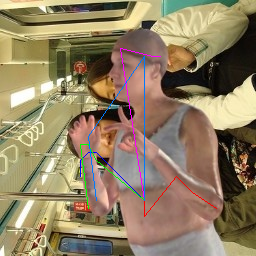

err : 
63.57354714377437


In [ ]:
import torch
import numpy as np
import torchvision
import tqdm
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import cv2

from glob import glob
import pandas
import torch.nn as nn

from google.colab.patches import cv2_imshow
import math
import matplotlib.pyplot as plt

device = 'cuda:0'
num_joints = 21

class imgData():
    def __init__(self, method=None):
        self.x_data = []
        self.y_data = []
        self.img_path = '/content/gdrive/My Drive/RSPdataset/test/Scissors/00000170.jpg'

        img = cv2.imread(self.img_path, cv2.IMREAD_COLOR)
        print(self.img_path)
        b, g, r = cv2.split(img)
        img = cv2.merge([r, g, b])
        self.x_data.append(img)

        img_pkl = '/content/gdrive/My Drive/RSPdataset/test/Scissors/meta/00000170.pkl'
        print(img_pkl)
        pkl = pandas.read_pickle(img_pkl)
        coords_2d = pkl['coords_2d']
        self.y_data.append(coords_2d)

    def __len__(self):
        return 1

    def __getitem__(self, idx):
        transform1 = torchvision.transforms.ToTensor()
        new_x_data = transform1(self.x_data[idx])

        return new_x_data, self.y_data[idx]



class Tester(object):
    def __init__(self, batch_size):
        self.batch_size = batch_size
        self._build_model()

        dataset = imgData()
        self.dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False)
        self.datalen = dataset.__len__()
        self.mse_all_img = []

        # Load of pretrained_weight file
        weight_PATH = '/content/gdrive/My Drive/CV_Final/finetunedweight.pth'
        self.poseNet.load_state_dict(torch.load(weight_PATH))

        print("Testing...")

    def _build_model(self):
        # 2d pose estimator
        poseNet = CPM2DPose()
        self.poseNet = poseNet.to(device)

        print('Finish build model.')

    def heatmap2skeleton(self, heatmapsPoseNet):
        skeletons = np.zeros((heatmapsPoseNet.shape[0], heatmapsPoseNet.shape[1], 2))
        for m in range(heatmapsPoseNet.shape[0]):
            for i in range(heatmapsPoseNet.shape[1]):
                u, v = np.unravel_index(np.argmax(heatmapsPoseNet[m][i]), (32, 32))
                skeletons[m, i, 0] = u * 8
                skeletons[m, i, 1] = v * 8
        return skeletons

    def test(self):
        for batch_idx, samples in enumerate(self.dataloader):
            x_test, y_test = samples
            heatmapsPoseNet = self.poseNet(x_test.cuda()).cpu().detach().numpy()
            skeletons_in = self.heatmap2skeleton(heatmapsPoseNet)
        
            # 3-1)
            print('3-1)')
            self.plot_hand(skeletons_in[0], '00000170')

            print('err : ')
            print(self.calc_error(skeletons_in[0], y_test.numpy()[0]))

    # input : skeletons_in(prediction), coords_2d(ground-truth)
    # output : err for an img
    def calc_error(self, skeletons_in, coords_2d):
        K = 21
        err = 0
        for k in range(K):
            err += math.sqrt( math.pow(skeletons_in[k][0]-coords_2d[k][0], 2) + math.pow(skeletons_in[k][1]-coords_2d[k][1], 2) )
        err = err/K

        return err

    # input : skeletons_in(prediction), coords_2d(ground-truth)
    # output : err for an img
    def calc_error(self, skeletons_in, coords_2d):
        K = 21
        err = 0
        for k in range(K):
            err += math.sqrt( math.pow(skeletons_in[k][0]-coords_2d[k][0], 2) + math.pow(skeletons_in[k][1]-coords_2d[k][1], 2) )
        err = err/K

        return err

    # 3-1)
    # visualize skeleton estimation results
    # input : skeletons(prediction), img_num
    def plot_hand(self, skeletons, img_num):
        img_path = '/content/gdrive/My Drive/RSPdataset/test/Scissors/' + img_num + '.jpg'
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        
        left,right = np.hsplit(skeletons, 2)
        skeletons = np.hstack([right, left])

        thumb = np.array(skeletons[0:5], dtype=np.int32)
        cv2.polylines(img, [thumb], False, (0,0,255))

        index = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[5:9], dtype=np.int32)])
        cv2.polylines(img, [index], False, (255,0,255))

        middle = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[9:13], dtype=np.int32)])
        cv2.polylines(img, [middle], False, (255,0,0))

        ring = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[13:17], dtype=np.int32)])
        cv2.polylines(img, [ring], False, (0,255,0))

        pinky = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[17:20], dtype=np.int32)])
        cv2.polylines(img, [pinky], False, (255,122,0))

        cv2_imshow(img)


def main():

    epochs = 100
    batchSize = 25
    learningRate = 5e-3

    tester = Tester(batchSize)
    tester.test()


if __name__ == '__main__':
    main()

Finish build model.
/content/gdrive/My Drive/RSPdataset/test/Paper/00000170.jpg
/content/gdrive/My Drive/RSPdataset/test/Paper/meta/00000170.pkl
Testing...
3-1)


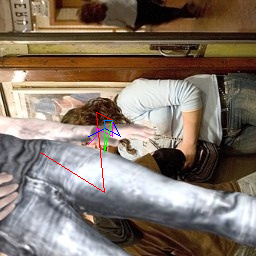

err : 
39.49139669569052


In [ ]:
import torch
import numpy as np
import torchvision
import tqdm
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import cv2

from glob import glob
import pandas
import torch.nn as nn

from google.colab.patches import cv2_imshow
import math
import matplotlib.pyplot as plt

device = 'cuda:0'
num_joints = 21

class imgData():
    def __init__(self, method=None):
        self.x_data = []
        self.y_data = []
        self.img_path = '/content/gdrive/My Drive/RSPdataset/test/Paper/00000170.jpg'

        img = cv2.imread(self.img_path, cv2.IMREAD_COLOR)
        print(self.img_path)
        b, g, r = cv2.split(img)
        img = cv2.merge([r, g, b])
        self.x_data.append(img)

        img_pkl = '/content/gdrive/My Drive/RSPdataset/test/Paper/meta/00000170.pkl'
        print(img_pkl)
        pkl = pandas.read_pickle(img_pkl)
        coords_2d = pkl['coords_2d']
        self.y_data.append(coords_2d)

    def __len__(self):
        return 1

    def __getitem__(self, idx):
        transform1 = torchvision.transforms.ToTensor()
        new_x_data = transform1(self.x_data[idx])

        return new_x_data, self.y_data[idx]



class Tester(object):
    def __init__(self, batch_size):
        self.batch_size = batch_size
        self._build_model()

        dataset = imgData()
        self.dataloader = DataLoader(dataset, batch_size=self.batch_size, shuffle=False)
        self.datalen = dataset.__len__()
        self.mse_all_img = []

        # Load of pretrained_weight file
        weight_PATH = '/content/gdrive/My Drive/CV_Final/finetunedweight.pth'
        self.poseNet.load_state_dict(torch.load(weight_PATH))

        print("Testing...")

    def _build_model(self):
        # 2d pose estimator
        poseNet = CPM2DPose()
        self.poseNet = poseNet.to(device)

        print('Finish build model.')

    def heatmap2skeleton(self, heatmapsPoseNet):
        skeletons = np.zeros((heatmapsPoseNet.shape[0], heatmapsPoseNet.shape[1], 2))
        for m in range(heatmapsPoseNet.shape[0]):
            for i in range(heatmapsPoseNet.shape[1]):
                u, v = np.unravel_index(np.argmax(heatmapsPoseNet[m][i]), (32, 32))
                skeletons[m, i, 0] = u * 8
                skeletons[m, i, 1] = v * 8
        return skeletons

    def test(self):
        for batch_idx, samples in enumerate(self.dataloader):
            x_test, y_test = samples
            heatmapsPoseNet = self.poseNet(x_test.cuda()).cpu().detach().numpy()
            skeletons_in = self.heatmap2skeleton(heatmapsPoseNet)
        
            # 3-1)
            print('3-1)')
            self.plot_hand(skeletons_in[0], '00000170')

            print('err : ')
            print(self.calc_error(skeletons_in[0], y_test.numpy()[0]))

    # input : skeletons_in(prediction), coords_2d(ground-truth)
    # output : err for an img
    def calc_error(self, skeletons_in, coords_2d):
        K = 21
        err = 0
        for k in range(K):
            err += math.sqrt( math.pow(skeletons_in[k][0]-coords_2d[k][0], 2) + math.pow(skeletons_in[k][1]-coords_2d[k][1], 2) )
        err = err/K

        return err

    # input : skeletons_in(prediction), coords_2d(ground-truth)
    # output : err for an img
    def calc_error(self, skeletons_in, coords_2d):
        K = 21
        err = 0
        for k in range(K):
            err += math.sqrt( math.pow(skeletons_in[k][0]-coords_2d[k][0], 2) + math.pow(skeletons_in[k][1]-coords_2d[k][1], 2) )
        err = err/K

        return err

    # 3-1)
    # visualize skeleton estimation results
    # input : skeletons(prediction), img_num
    def plot_hand(self, skeletons, img_num):
        img_path = '/content/gdrive/My Drive/RSPdataset/test/Paper/' + img_num + '.jpg'
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        
        left,right = np.hsplit(skeletons, 2)
        skeletons = np.hstack([right, left])

        thumb = np.array(skeletons[0:5], dtype=np.int32)
        cv2.polylines(img, [thumb], False, (0,0,255))

        index = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[5:9], dtype=np.int32)])
        cv2.polylines(img, [index], False, (255,0,255))

        middle = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[9:13], dtype=np.int32)])
        cv2.polylines(img, [middle], False, (255,0,0))

        ring = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[13:17], dtype=np.int32)])
        cv2.polylines(img, [ring], False, (0,255,0))

        pinky = np.vstack([np.array(skeletons[0], dtype=np.int32), np.array(skeletons[17:20], dtype=np.int32)])
        cv2.polylines(img, [pinky], False, (255,122,0))

        cv2_imshow(img)


def main():

    epochs = 100
    batchSize = 25
    learningRate = 5e-3

    tester = Tester(batchSize)
    tester.test()


if __name__ == '__main__':
    main()